In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

import tensorflow_datasets as tfds

import numpy as np

import matplotlib.pyplot as plt

from rec.models.resnet_vae import BidirectionalResNetVAE
from rec.models.custom_modules import ReparameterizedConv2D, ReparameterizedConv2DTranspose
from rec.models.pixel_cnn import PixelCNNResidualBlock

In [2]:
# Taken from https://github.com/tensorflow/tensorflow/issues/31135#issuecomment-516526113
# Set CPU as available physical device
tf.config.experimental.set_visible_devices([], 'GPU')

In [3]:
model_save_dir = "../../../models/relative-entropy-coding/cifar10/resnet_vae/latents_variable_beta_1.000_lamb_0.100/"

In [4]:
model = BidirectionalResNetVAE(use_iaf=True,
                               num_res_blocks=4,
                               deterministic_filters=160,
                               stochastic_filters=32)

model(tf.zeros((1, 32, 32, 3)))

# -------------------------------------------------------------------------
# Create Checkpoints
# -------------------------------------------------------------------------
ckpt = tf.train.Checkpoint(model=model)

manager = tf.train.CheckpointManager(ckpt, model_save_dir, max_to_keep=3)

# Restore previous session
ckpt.restore(manager.latest_checkpoint)
if manager.latest_checkpoint:
    print(f"Restored model from {manager.latest_checkpoint}")
else:
    print("Initializing model from scratch.")

Restored model from ../../../models/relative-entropy-coding/cifar10/resnet_vae/latents_variable_beta_1.000_lamb_0.100/ckpt-249


In [5]:
ds = tfds.load("cifar10", data_dir="/scratch/gf332/datasets/cifar10")["train"]
ds = ds.map(lambda x: tf.clip_by_value((tf.cast(x["image"], tf.float32) + 0.5) / 256., 0.0, 1.0) - 0.5)

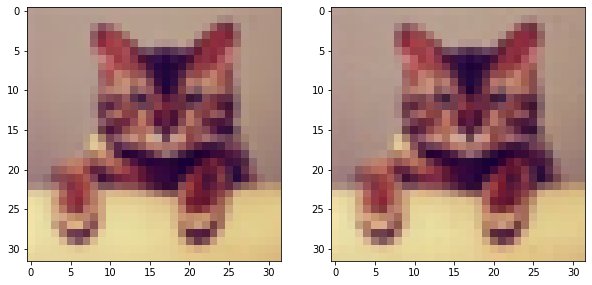

In [8]:
for img in ds.take(1):
    res = model(img[None, ...])
    
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(img + 0.5)
    
    plt.subplot(122)
    plt.imshow(res[0, ...])

In [13]:
model.kl_divergence(empirical=False)

ModelError: KL divergence cannot be computed analytically whenusing IAFs as posterior!

In [8]:
#tf.nn.moments(model.residual_blocks[0].infer_posterior_loc_head.kernel_weights, [0, 1, 3])
tf.reduce_min(model._generative_base)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.016166061>

In [18]:
snake_flatten = lambda l: [f"_{item}" for sublist in l for item in sublist]

def print_dict(d):
    
    items = []
    
    for k, v in d.items():
        items.append(k)
        items.append(f"{v:.4f}" if type(v) == float else f"{v}")
        
    return '_'.join(items)

print_dict({"lo": True, "haha": 123, "beb": np.pi})

'lo_True_haha_123_beb_3.1416'